In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)


In [16]:

# Handle missing values (in this dataset, missing values are encoded as 0)
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA)
data.fillna(data.mean(), inplace=True)


/var/folders/c5/zyd8z1kn38124wqv1bc05h500000gn/T/ipykernel_14042/2886734956.py:3: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



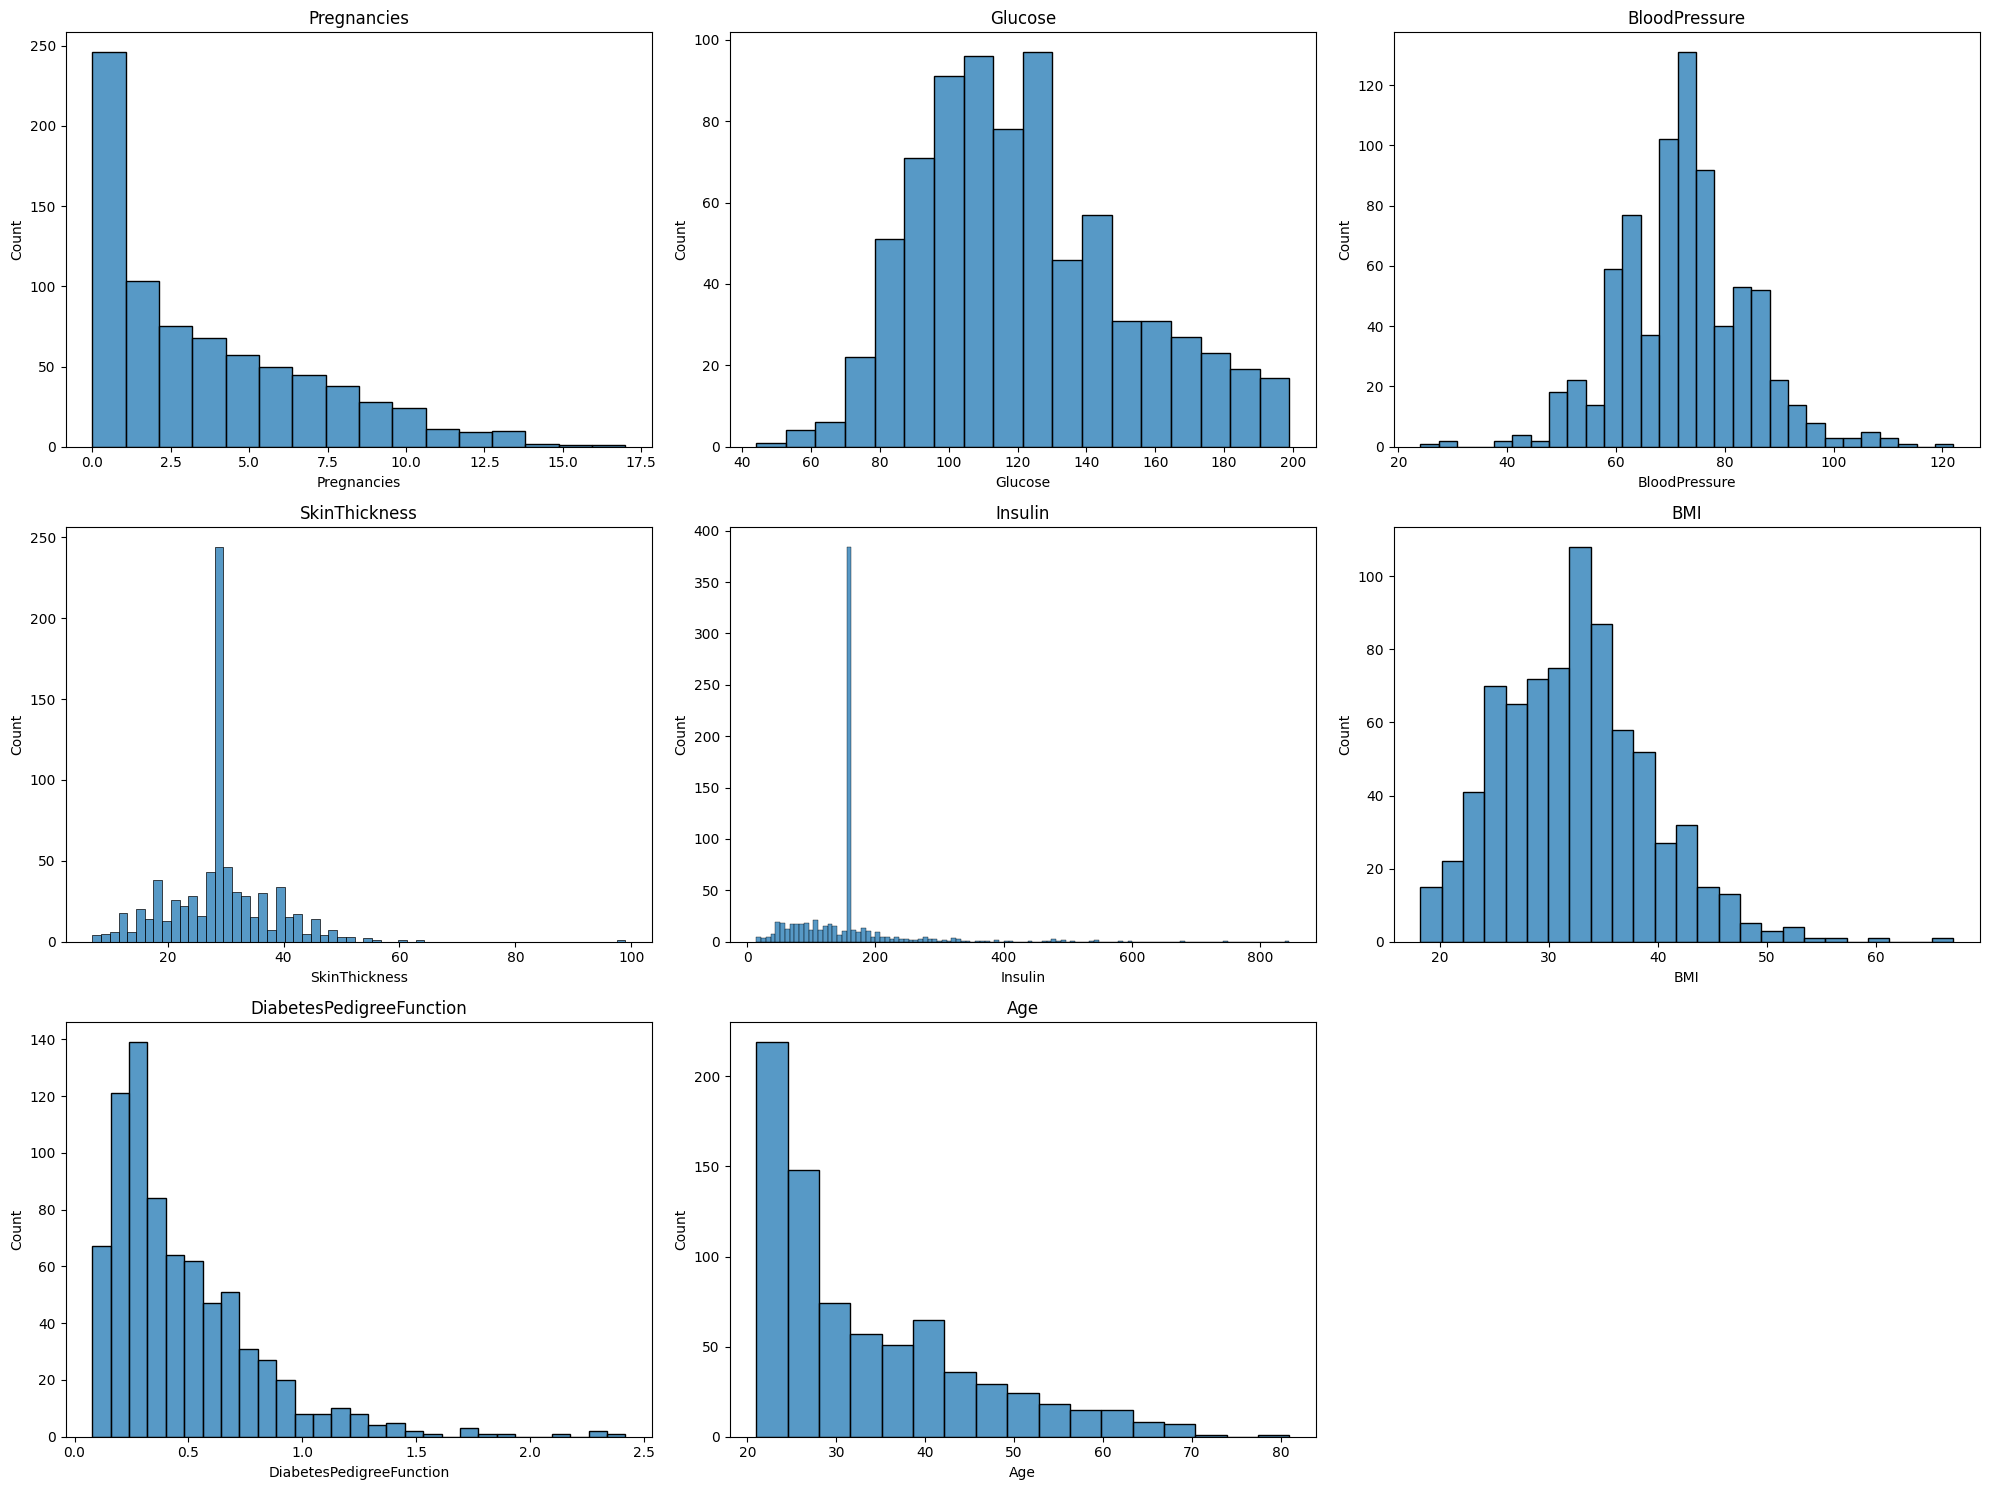

In [17]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)

# Handle missing values
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

# Exploratory Data Analysis (EDA)
# Distribution of each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [18]:

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Outcome', axis=1))
X = pd.DataFrame(scaled_features, columns=columns[:-1])
y = data['Outcome']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)

# Handle missing values (in this dataset, missing values are encoded as 0)
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, pd.NA)
data.fillna(data.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Outcome', axis=1))
X = pd.DataFrame(scaled_features, columns=columns[:-1])
y = data['Outcome']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/c5/zyd8z1kn38124wqv1bc05h500000gn/T/ipykernel_14042/701029573.py:12: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [20]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

# Train an explainable model
ebm = ExplainableBoostingClassifier(random_state=42)
ebm.fit(X_train, y_train)

# Global explanation
ebm_global = ebm.explain_global()
show(ebm_global)


<!-- http://127.0.0.1:7001/10855267488/ -->